# Data wrangling

The purpose of this notebook is to make our hands durty (i.e to handle with the datasets). We will try to to clean and understand what is in the data

In [1]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
#load data
raw_data_folder = '../../data/raw_data/' 
characters_header_name = ['movie_wiki_id','freebase_movie_id','movie_release_date', 'character_name', 'birth', 'gender', 'height', 'ethnicity', 'name', 'release_age', 'freebase_character_map_id', 'freebase_character_id', 'freebase_actor_id']
movies_header_name = ['wiki_id', 'freebase_id', 'name', 'release_date', 'revenue', 'runtime', 'languages', 'country', 'genres']


characters_df = pd.read_csv( raw_data_folder + 'character.metadata.tsv', sep = '\t', names = characters_header_name)
movies_df = pd.read_csv( raw_data_folder + 'movie.metadata.tsv', sep = '\t', names= movies_header_name, index_col= 'wiki_id' )

characters_df.head(5)

,movie_wiki_id,freebase_movie_id,movie_release_date,character_name,birth,gender,height,ethnicity,name,release_age,freebase_character_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [3]:
movies_df.head()

,freebase_id,name,release_date,revenue,runtime,languages,country,genres
wiki_id,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
#check if all movies has an wiki_id
movies_df[movies_df.index.isna()] 

,freebase_id,name,release_date,revenue,runtime,languages,country,genres
wiki_id,,,,,,,,


In [5]:
#clean movies dataframe 

#remove useless columns
movies_clean_df = movies_df.copy()
movies_clean_df['freebase_id']
movies_clean_df.drop('freebase_id', axis= 1, inplace= True)

#remove all freebase code such as "/m/02h40lc"
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('"/m/\w*": ', '', regex= True)
movies_clean_df['country'] = movies_clean_df['country'].str.replace('"/m/\w*": ', '', regex= True)
movies_clean_df['genres'] = movies_clean_df['genres'].str.replace('"/m/\w*": ', '', regex= True)

#remove ""
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('"', '', regex= False)
movies_clean_df['country'] = movies_clean_df['country'].str.replace('"', '', regex= False)
movies_clean_df['genres'] = movies_clean_df['genres'].str.replace('"', '', regex= False)


#remove {}
#before to remove all the curly brackets, let's fill with None items which have empty {}
movies_clean_df['languages'] = movies_clean_df['languages'].replace('{}', None , regex= False)
movies_clean_df['country'] = movies_clean_df['country'].replace('{}', None , regex= False)
movies_clean_df['genres'] = movies_clean_df['genres'].replace('{}', None , regex= False)


#now we can remove the brackets {}
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('{', '', regex= False)
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('}', '', regex= False)

movies_clean_df['country'] = movies_clean_df['country'].str.replace('{', '', regex= False)
movies_clean_df['country'] = movies_clean_df['country'].str.replace('}', '', regex= False)

movies_clean_df['genres'] = movies_clean_df['genres'].str.replace('{', '', regex= False)
movies_clean_df['genres'] = movies_clean_df['genres'].str.replace('}', '', regex= False)


#remove Language in languages columns 
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('Language', '', regex= False, case = False)


#save only th the year in released date column and convert it to int object
movies_clean_df['release_date'] = movies_clean_df['release_date'].str.replace('-.*', '', regex= True)
movies_clean_df['release_date'] = pd.to_numeric(movies_clean_df['release_date'], errors= 'coerce', downcast= 'integer') # it stil convert into float... 




In [6]:
movies_clean_df.head()

,name,release_date,revenue,runtime,languages,country,genres
wiki_id,,,,,,,
975900,Ghosts of Mars,2001.0,14010832.0,98.0,English,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
28463795,Brun bitter,1988.0,NaN,83.0,Norwegian,Norway,"Crime Fiction, Drama"
9363483,White Of The Eye,1987.0,NaN,110.0,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
261236,A Woman in Flames,1983.0,NaN,106.0,German,Germany,Drama


In [7]:
#  check for missing data
for columns in movies_clean_df.columns:
    missing_data = movies_clean_df[columns].isna().sum()
    print(f"{missing_data} out of {len(movies_clean_df[columns])} movies have no {columns} data, which means {missing_data/len(movies_clean_df[columns])*100}% of the data is missing")

#missing_plots = raw_plot_df['plot'].isna().sum()
#print(f"{missing_plots} out of {len(raw_plot_df['plot'])} plots have no data, which means {missing_plots/len(raw_plot_df['plot'])*100}% of the data is missing")

0 out of 81741 movies have no name data, which means 0.0% of the data is missing
6902 out of 81741 movies have no release_date data, which means 8.443743042047442% of the data is missing
73340 out of 81741 movies have no revenue data, which means 89.72241592346558% of the data is missing
20450 out of 81741 movies have no runtime data, which means 25.018044800039146% of the data is missing
13866 out of 81741 movies have no languages data, which means 16.963335413073% of the data is missing
8154 out of 81741 movies have no country data, which means 9.975410136895805% of the data is missing
2294 out of 81741 movies have no genres data, which means 2.8064251721902105% of the data is missing


In [8]:
#clean characters dataframe
characters_clean_df = characters_df.copy()

#remove useless columns
characters_clean_df.drop('freebase_movie_id', axis= 1, inplace= True)
characters_clean_df.drop('movie_release_date', axis= 1, inplace= True)
characters_clean_df.drop('freebase_character_map_id', axis= 1, inplace= True)
characters_clean_df.drop('freebase_character_id', axis= 1, inplace= True)

In [9]:
#maybe drop ethinity columns due to proportion of avaible data
characters_clean_df['ethnicity'].isna().sum()/characters_clean_df.shape[0] * 100

76.46654196317031

In [10]:
characters_clean_df.head()


,movie_wiki_id,character_name,birth,gender,height,ethnicity,name,release_age,freebase_actor_id
0,975900,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/03wcfv7
1,975900,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0346l4
2,975900,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/01vw26l
3,975900,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/034hyc
4,975900,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/01y9xg


In [11]:
#save clean version of dataframes 
movies_clean_df.to_csv('../../data/cleaned_data/movies_data.csv')
characters_clean_df.to_csv('../../data/cleaned_data/characters_data.csv')

Let's now try to understand the dataset

In [12]:
#idee de plot 
#distribution film par annee et par pays 
#distribution film par année et par pays subset
#distribution film par region 
#distribution film par année et par region 
#distribution film avec le premier genre

Text(0, 0.5, ' # movies released')

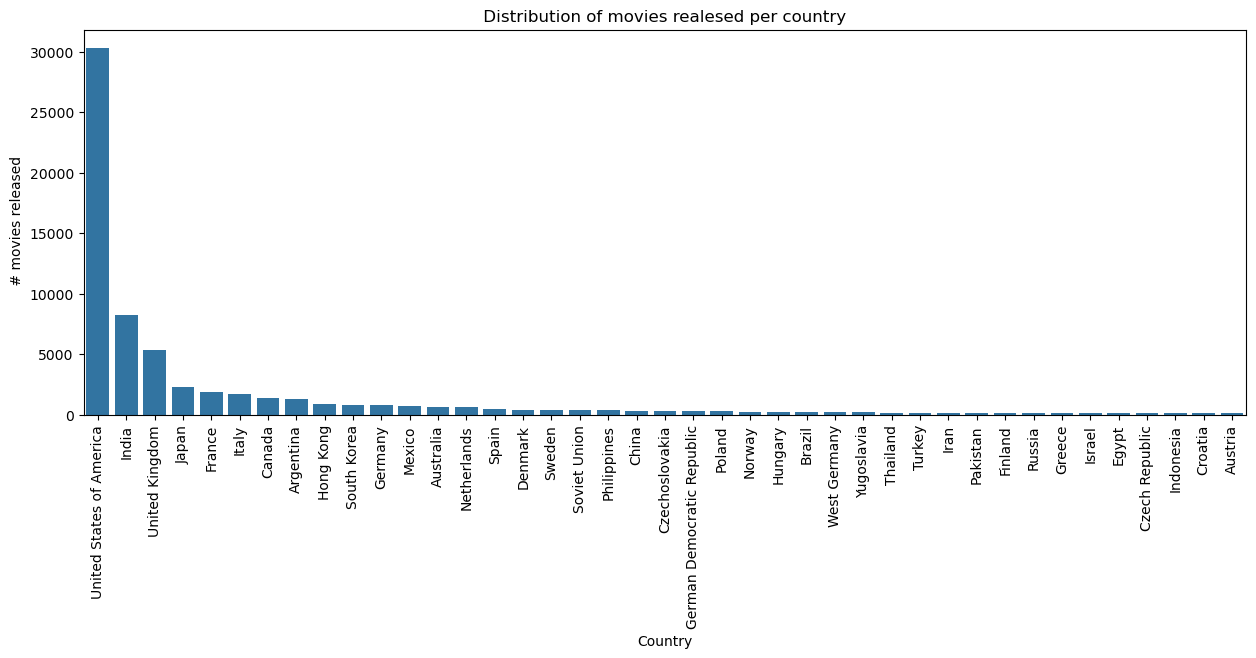

In [14]:
#distribution of number of film realized by country
#first we focus on film realized by one unique country and not collaborate with other

dist_per_country1_df = movies_clean_df.copy(deep= True)

#first drop row which containts None

#dist_per_country1_df.isna().sum()  # =8154
#dist_per_country1_df.shape[0] #81741
dist_per_country1_df.dropna(subset = ['country'], inplace=True)

# now remove all film that come from a collaboration (i.e contain "," )
dist_per_country1_df = dist_per_country1_df[~ dist_per_country1_df['country'].str.contains(',', regex= False).values]

# get nbr movies released by each country
freq_per_country1_df = dist_per_country1_df['country'].value_counts()


#do a cut off 
freq_per_country1_df = freq_per_country1_df[freq_per_country1_df.values> 100]

#plot result
plt.figure(figsize=(15, 5))
sns.barplot(x= freq_per_country1_df.index, y= freq_per_country1_df.values)
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed per country ")
plt.xlabel("Country")
plt.ylabel(" # movies released")



Text(0, 0.5, ' # movies released')

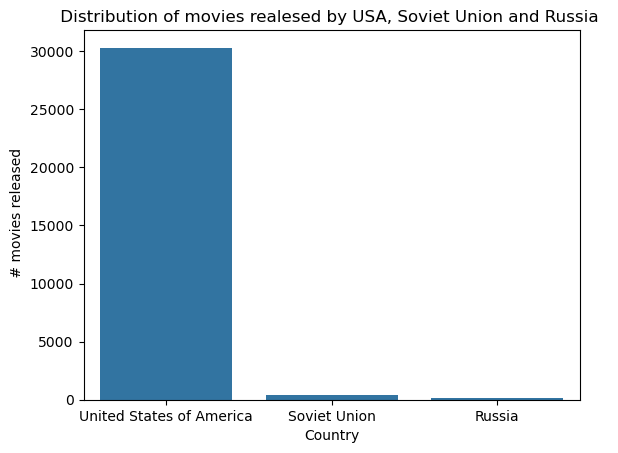

In [15]:
# lets focus on USA, Soviet Union and Russia

#di
dist_per_sub_country1_df = dist_per_country1_df[(dist_per_country1_df['country'] == 'United States of America') | (dist_per_country1_df['country'] == 'Soviet Union') | (dist_per_country1_df['country'] == 'Russia')]

freq_per_sub_country1_df = dist_per_sub_country1_df['country'].value_counts()
sns.barplot(x= freq_per_sub_country1_df.index, y= freq_per_sub_country1_df.values)
plt.title(" Distribution of movies realesed by USA, Soviet Union and Russia  ")
plt.xlabel("Country")
plt.ylabel(" # movies released")




C:\Users\ismae\AppData\Local\Temp\ipykernel_24136\196700248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_per_country1_date_df['release_date'] = dist_per_country1_date_df['release_date'].astype(int, copy= True)


Text(0, 0.5, ' # movies released')

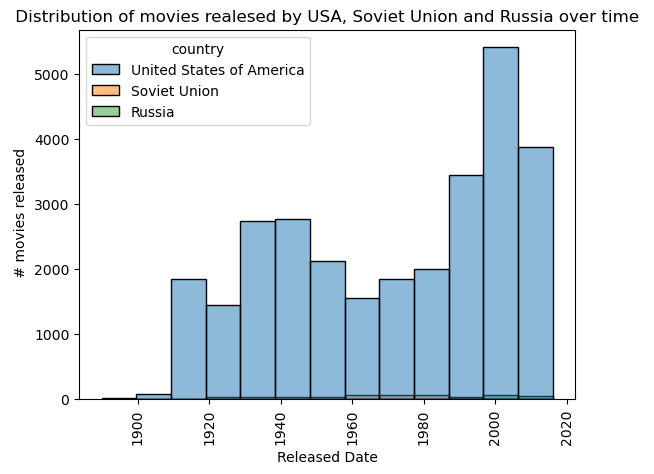

In [16]:
# lets go deeper in analysis by including time


# remove None value in realese_date column and convert it to int
dist_per_country1_date_df= dist_per_sub_country1_df.dropna(subset = ['release_date'],inplace=False)
dist_per_country1_date_df['release_date'] = dist_per_country1_date_df['release_date'].astype(int, copy= True)

#plot
sns.histplot(x ='release_date', hue= 'country', data= dist_per_country1_date_df, binwidth= 10); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by USA, Soviet Union and Russia over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")

#lets do this but in separate plot since we don't see a lot...





Text(0, 0.5, ' # movies released')

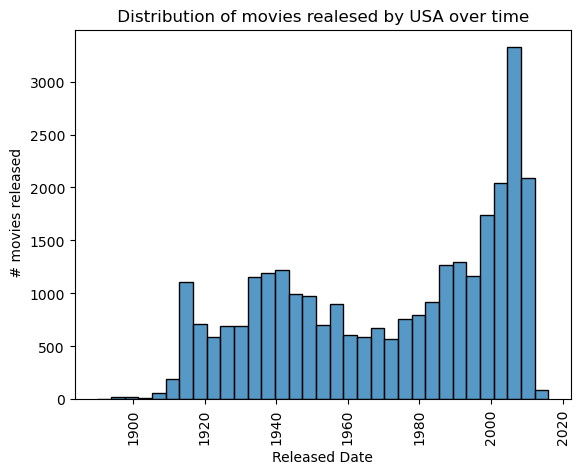

In [17]:
# get only USA data
dist_USA_date_df= dist_per_sub_country1_df[dist_per_sub_country1_df['country'] == 'United States of America']

#plot
sns.histplot(x ='release_date', data= dist_USA_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by USA over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")






Text(0, 0.5, ' # movies released')

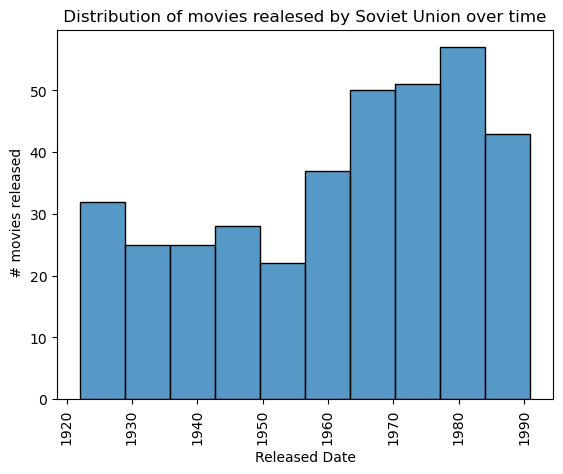

In [18]:
# get only Soviet Union  data
dist_Soviet_date_df= dist_per_sub_country1_df[dist_per_sub_country1_df['country'] == 'Soviet Union']

#plot
sns.histplot(x ='release_date', data= dist_Soviet_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by Soviet Union over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")






Text(0, 0.5, ' # movies released')

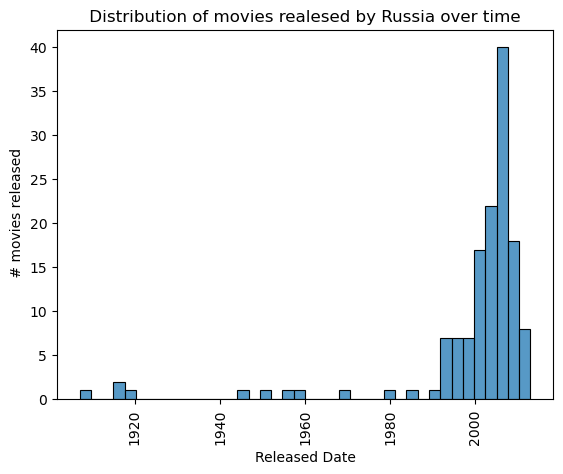

In [19]:
# get only Russia  data
dist_Russia_date_df= dist_per_sub_country1_df[dist_per_sub_country1_df['country'] == 'Russia']

#plot
sns.histplot(x ='release_date', data= dist_Russia_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by Russia over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")






Lets do the same analysis but per region 

In [20]:

print((list(dist_per_country1_df['country'].value_counts().index)))

['United States of America', 'India', 'United Kingdom', 'Japan', 'France', 'Italy', 'Canada', 'Argentina', 'Hong Kong', 'South Korea', 'Germany', 'Mexico', 'Australia', 'Netherlands', 'Spain', 'Denmark', 'Sweden', 'Soviet Union', 'Philippines', 'China', 'Czechoslovakia', 'German Democratic Republic', 'Poland', 'Norway', 'Hungary', 'Brazil', 'West Germany', 'Yugoslavia', 'Thailand', 'Turkey', 'Iran', 'Pakistan', 'Finland', 'Russia', 'Greece', 'Israel', 'Egypt', 'Czech Republic', 'Indonesia', 'Croatia', 'Austria', 'South Africa', 'New Zealand', 'Malaysia', 'Sri Lanka', 'Ireland', 'Portugal', 'Belgium', 'Romania', 'Cambodia', 'Bulgaria', 'Bangladesh', 'Singapore', 'Taiwan', 'Switzerland', 'Iceland', 'England', 'Nepal', 'Colombia', 'Estonia', 'Cuba', 'Burma', 'Chile', 'Morocco', 'Serbia', 'Puerto Rico', 'Lebanon', 'Nigeria', 'Albania', 'Venezuela', 'Vietnam', 'Tunisia', 'Democratic Republic of the Congo', 'Azerbaijan', 'Algeria', 'Senegal', 'Georgia', 'Slovenia', 'Ukraine', 'Weimar Republi

In [21]:
#first lets define the different region with corresponding country in it
north_america_list = ["United States of America", "Canada", "Mexico", "Puerto Rico", "Bahamas"]
south_america_list = ["Argentina", "Brazil", "Chile", "Venezuela", "Colombia", "Uruguay", "Bolivia", "Peru", "Costa Rica", "Cuba", "Haiti", "Jamaica"]
west_europe = ["United Kingdom", "France", "Italy", "Spain", "Netherlands", "Germany", "West Germany", "Austria", "Belgium", "Switzerland", "Ireland", "Portugal", "Luxembourg", "Malta", "Weimar Republic", "England", "Scotland", "Wales", "Kingdom of Great Britain", "Nazi Germany"]
east_central_europe =["Soviet Union", "Czechoslovakia", "German Democratic Republic", "Poland", "Hungary", "Yugoslavia", "Russia", "Czech Republic", "Croatia", "Romania", "Bulgaria", "Albania", "Estonia", "Georgia", "Slovenia", "Ukraine", "Serbia", "Republic of Macedonia", "Armenia", "Georgian SSR", "Serbia and Montenegro", "Lithuania", "Slovakia", "Azerbaijan", "Federal Republic of Yugoslavia", "Socialist Federal Republic of Yugoslavia", "Uzbek SSR", "Uzbekistan", "Soviet occupation zone", "Crime", "Bosnia and Herzegovina", "Greece"]
scandinavia_north_europe = ["Sweden", "Denmark", "Norway", "Finland", "Iceland", "Northern Ireland"]
africa = ["Nigeria", "South Africa", "Egypt", "Morocco", "Tunisia", "Senegal", "Ethiopia", "Burkina Faso", "Democratic Republic of the Congo", "Cameroon", "Mali", "Algeria", "Guinea-Bissau", "Kenya", "Libya", "Zimbabwe"]
middle_east =["Israel", "Lebanon", "Jordan", "Iraq", "Iran", "United Arab Emirates", "Palestinian territories", "Kuwait", "Bahrain", "Cyprus", "Turkey"]
east_asia = ["Japan", "China", "Hong Kong", "South Korea", "Korea", "Taiwan", "Mongolia", "Vietnam", "Thailand", "Indonesia", "Malaysia", "Cambodia", "Singapore", "Philippines", "Sri Lanka", "Bhutan", "Burma"]
south_asia_india= ["India", "Pakistan", "Bangladesh", "Nepal", "Afghanistan"]
oceania = ["Australia", "New Zealand"]

#then define a function in order to sort country in corresponding region
def choice_region(country):
    if country in north_america_list:
        return 'North America'
    elif country in south_america_list:
        return 'South America'
    elif country in west_europe:
        return 'West Europe'
    elif country in east_central_europe:
        return 'East/Central Europe'
    elif country in scandinavia_north_europe:
        return 'Scandinavia/North Europe'
    elif country in africa:
        return 'Africa'
    elif country in middle_east:
        return 'Middle East'
    elif country in east_asia:
        return 'East Asia'
    elif country in south_asia_india:
        return 'South Asia/India'
    elif country in oceania:
        return 'Ociana'
    else: 
        return None
    
#finally add new column to dataset with "region" as label fill the new column
dist_per_region_df = dist_per_country1_df.assign(region= lambda x: x['country'].apply(choice_region)) #only one got None (Malayalam Language)


Text(0, 0.5, ' # movies released')

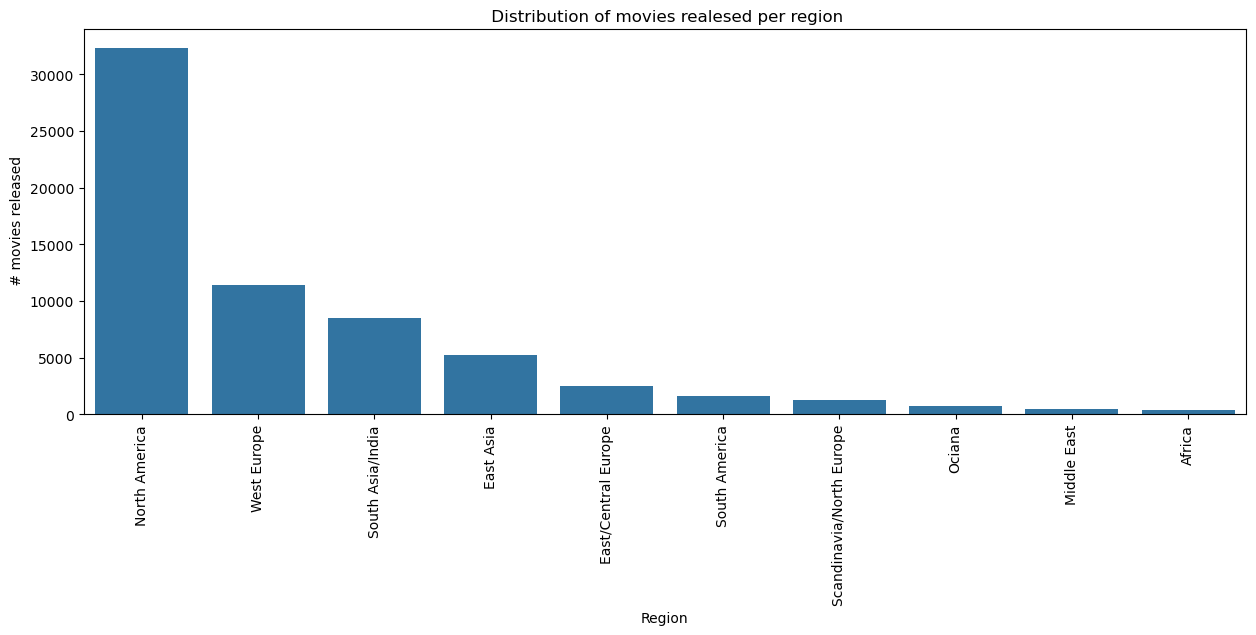

In [22]:
#distribution of number of film realized by region
# get nbr movies released by each region
freq_per_region_df = dist_per_region_df['region'].value_counts()


#do a cut off 
#freq_per_country1_df = freq_per_country1_df[freq_per_country1_df.values> 100]



#plot result
plt.figure(figsize=(15, 5))
sns.barplot(x= freq_per_region_df.index, y= freq_per_region_df.values)
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed per region")
plt.xlabel("Region")
plt.ylabel(" # movies released")


In [23]:
#lets focus now on the first 7 (North America, West Europe, South Asia/India, East Asia, East/Central Europe South America, Scandinave/North Europe)
# remove None value in realese_date column and convert it to int
dist_per_region_date_df= dist_per_region_df.dropna(subset = ['release_date'],inplace=False)
dist_per_region_date_df['release_date'] = dist_per_region_date_df['release_date'].astype(int, copy= True)


C:\Users\ismae\AppData\Local\Temp\ipykernel_24136\567686416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_per_region_date_df['release_date'] = dist_per_region_date_df['release_date'].astype(int, copy= True)


Text(0, 0.5, ' # movies released')

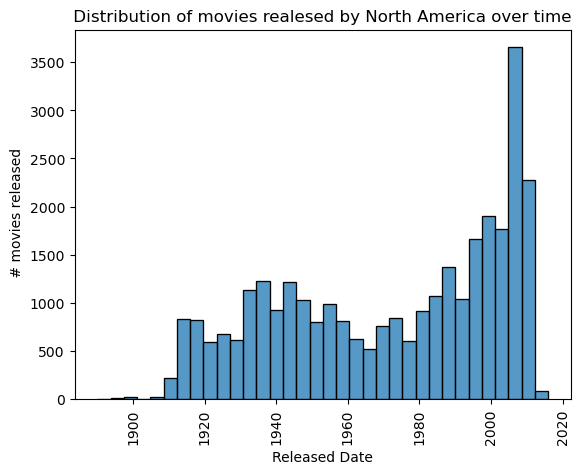

In [24]:
#North America
dist_north_america_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'North America']

#plot
sns.histplot(x ='release_date', data= dist_north_america_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by North America over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")

Text(0, 0.5, ' # movies released')

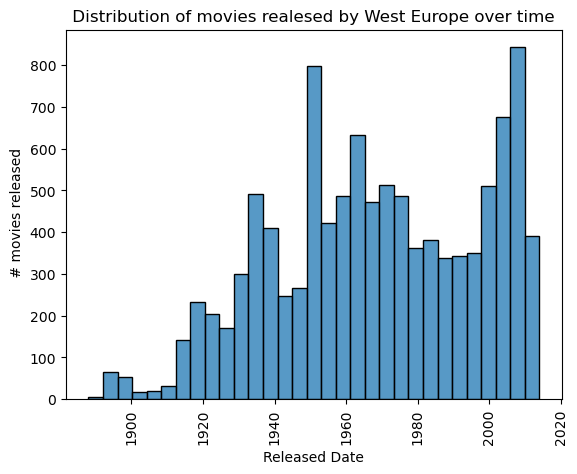

In [25]:
#West Europe
dist_west_europe_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'West Europe']

#plot
sns.histplot(x ='release_date', data= dist_west_europe_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by West Europe over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")


Text(0, 0.5, ' # movies released')

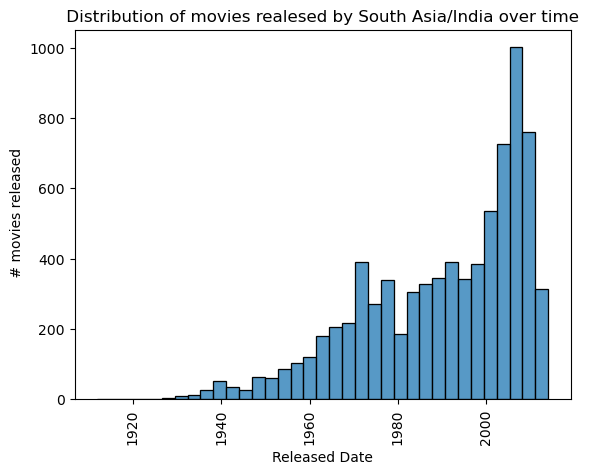

In [26]:
#South Asia/India
dist_south_asia_india_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'South Asia/India']

#plot
sns.histplot(x ='release_date', data= dist_south_asia_india_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by South Asia/India over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")


Text(0, 0.5, ' # movies released')

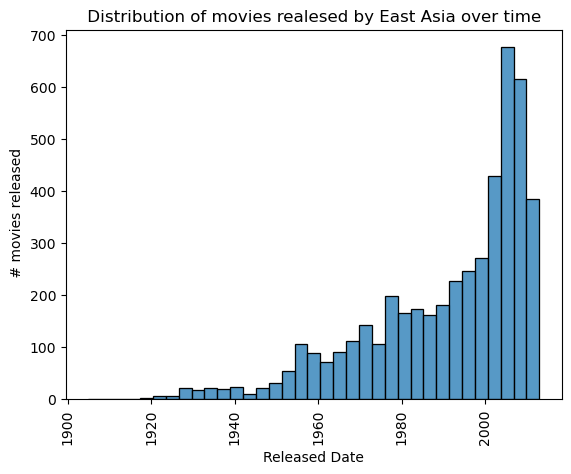

In [27]:
#East Asia
dist_east_asia_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'East Asia']

#plot
sns.histplot(x ='release_date', data= dist_east_asia_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by East Asia over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")


Text(0, 0.5, ' # movies released')

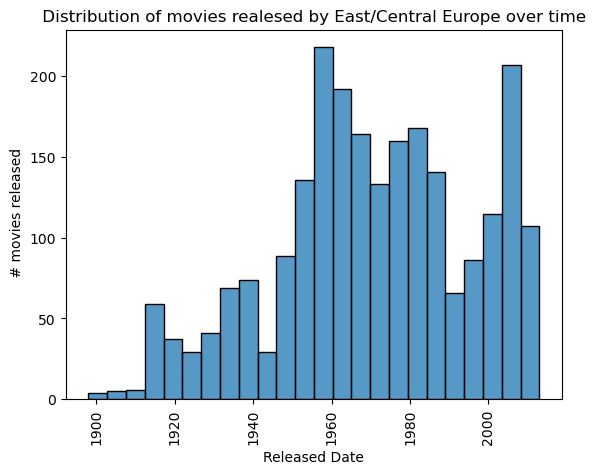

In [28]:
# East/Central Europe
dist_east_central_europe_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'East/Central Europe']

#plot
sns.histplot(x ='release_date', data= dist_east_central_europe_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by East/Central Europe over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")


Text(0, 0.5, ' # movies released')

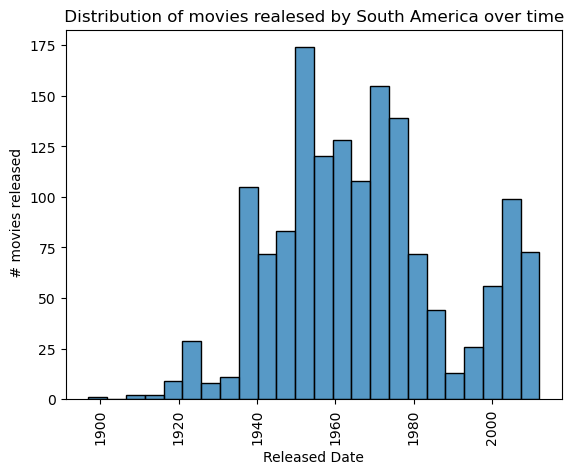

In [29]:
# East/Central Europe
dist_south_america_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'South America']

#plot
sns.histplot(x ='release_date', data= dist_south_america_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by South America over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")

Text(0, 0.5, ' # movies released')

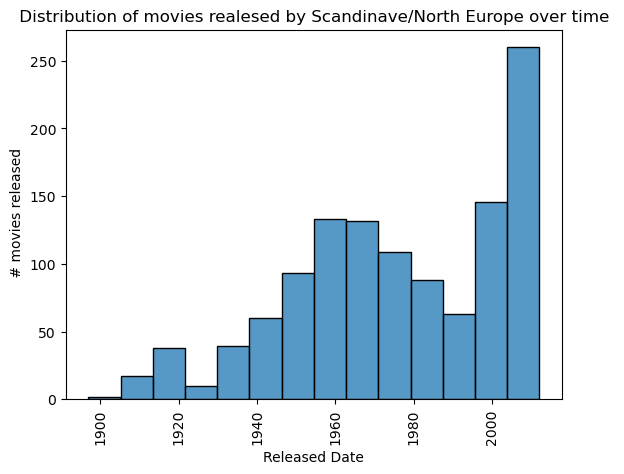

In [30]:
#Scandinavia/North Europe
dist_scandinave_north_europe_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'Scandinavia/North Europe']

#plot
sns.histplot(x ='release_date', data= dist_scandinave_north_europe_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by Scandinave/North Europe over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")